### Read the data

In [ ]:
import pandas as pd

# Define input and output file paths
input_file = r"C:/Users/"
output_file = "C:/Users/"
# Read the data with the specified delimiter ';'
df = pd.read_csv(input_file, delimiter=';')

# Filter out rows where the date is from 2011
df = df[df['date'].str.startswith('2012') | df['date'].str.startswith('2013') | df['date'].str.startswith('2014')]

df.reset_index(drop=True, inplace=True)

# Save the DataFrame to a CSV file
df.to_csv(output_file, index=False)


print("Conversion completed successfully.")


#### Columns:

In [2]:
print(df.columns)

Index(['date', 'MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006',
       'MT_007', 'MT_008', 'MT_009',
       ...
       'MT_361', 'MT_362', 'MT_363', 'MT_364', 'MT_365', 'MT_366', 'MT_367',
       'MT_368', 'MT_369', 'MT_370'],
      dtype='object', length=371)


### Summary of the Dataset

In [3]:
print(df)


                       date            MT_001            MT_002  \
0       2012-01-01 00:00:00                 0                 0   
1       2012-01-01 00:15:00  3,80710659898477  22,7596017069701   
2       2012-01-01 00:30:00   5,0761421319797  22,7596017069701   
3       2012-01-01 00:45:00  3,80710659898477  22,7596017069701   
4       2012-01-01 01:00:00  3,80710659898477  22,7596017069701   
...                     ...               ...               ...   
105211  2014-12-31 22:45:00  1,26903553299492  22,0483641536273   
105212  2014-12-31 23:00:00  2,53807106598985  22,0483641536273   
105213  2014-12-31 23:15:00  2,53807106598985  21,3371266002845   
105214  2014-12-31 23:30:00  2,53807106598985  20,6258890469417   
105215  2014-12-31 23:45:00  1,26903553299492  21,3371266002845   

                  MT_003            MT_004            MT_005  \
0                      0                 0                 0   
1       77,3240660295395  136,178861788618  70,7317073170732   
2  

## Feature Scaling

In [4]:
from sklearn.preprocessing import RobustScaler

# Drop non-numeric columns and replace commas with periods
df_numeric = df.drop(columns=['date']).replace(',', '.', regex=True)

# Convert dataframe to numeric type
df_numeric = df_numeric.apply(pd.to_numeric)

# Initialize RobustScaler
scaler = RobustScaler()

# Iterate through each column (client) and scale the data
for column in df_numeric.columns:
    # Skip the date column
    if column == 'date':
        continue
    
    # Scale the data for each client
    df_numeric[[column]] = scaler.fit_transform(df_numeric[[column]])

# Reinsert the scaled data into the original DataFrame
scaled_df = pd.concat([df['date'], df_numeric], axis=1)

# Save the scaled DataFrame to a CSV file
output_scaled_file = "C:/Users/"
scaled_df.to_csv(output_scaled_file, index=False)

print("Scaling completed successfully.")


Scaling completed successfully.


In [3]:
from sklearn.preprocessing import RobustScaler

# Drop non-numeric columns and replace commas with periods
df_numeric = df.drop(columns=['date']).replace(',', '.', regex=True)

# Convert dataframe to numeric type
df_numeric = df_numeric.apply(pd.to_numeric)

# Robust Scaling
scaler = RobustScaler()
scaled_df = scaler.fit_transform(df_numeric)

# Normalize the data (Min-Max scaling)
# normalized_df = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())

# Alternatively, you can use Z-score scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_df = scaler.fit_transform(df_numeric)

# Now, 'normalized_df' contains the scaled features ready for clustering

### Dimensionality Reduction with t-SNE & Visualization the Dataset

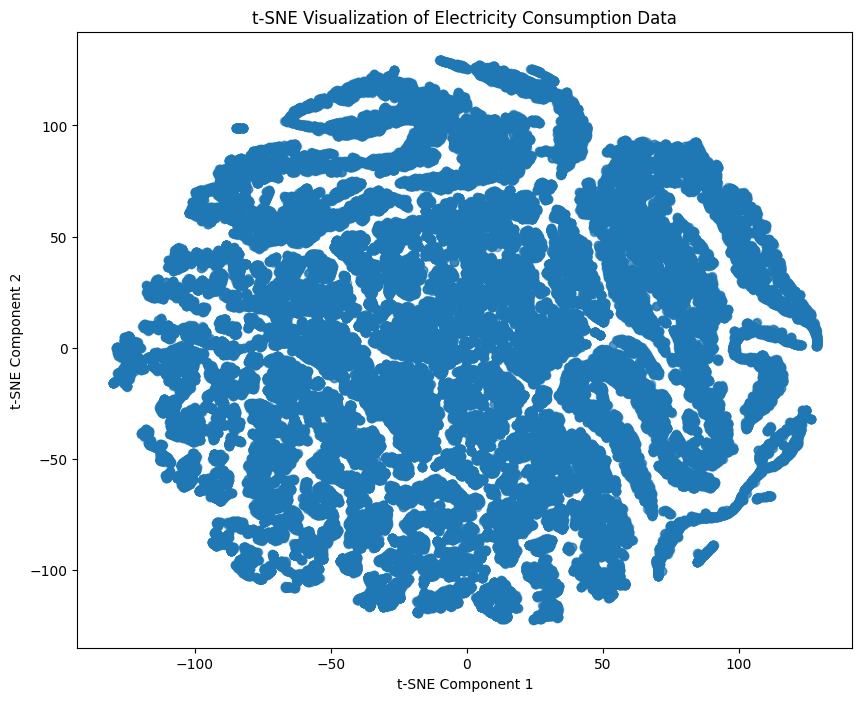

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'scaled_df' contains the scaled features obtained after feature scaling

# Exclude the date column before applying t-SNE
scaled_features = scaled_df.drop(columns=['date'])

# Check for NaN values and handle them if present
if scaled_features.isnull().values.any():
    # Handle missing values (for example, by filling with the mean of each column)
    scaled_features.fillna(scaled_features.mean(), inplace=True)

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Scatter plot of t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Electricity Consumption Data')
plt.show()


In [6]:
print(scaled_df)

                       date    MT_001    MT_002  MT_003    MT_004    MT_005  \
0       2012-01-01 00:00:00 -0.666667 -3.250000    -2.0 -2.227273 -2.000000   
1       2012-01-01 00:15:00  0.333333 -0.583333    87.0  0.818182  1.052632   
2       2012-01-01 00:30:00  0.666667 -0.583333    87.0  0.818182  1.157895   
3       2012-01-01 00:45:00  0.333333 -0.583333    87.0  0.909091  1.000000   
4       2012-01-01 01:00:00  0.333333 -0.583333    87.0  0.909091  1.263158   
...                     ...       ...       ...     ...       ...       ...   
105211  2014-12-31 22:45:00 -0.333333 -0.666667     0.0  1.272727  1.684211   
105212  2014-12-31 23:00:00  0.000000 -0.666667     0.0  1.136364  1.684211   
105213  2014-12-31 23:15:00  0.000000 -0.750000     0.0  1.500000  1.526316   
105214  2014-12-31 23:30:00  0.000000 -0.833333     0.0  1.409091  1.578947   
105215  2014-12-31 23:45:00 -0.333333 -0.750000     0.0  1.500000  1.684211   

          MT_006  MT_007  MT_008    MT_009  ...    

## Elbow Method

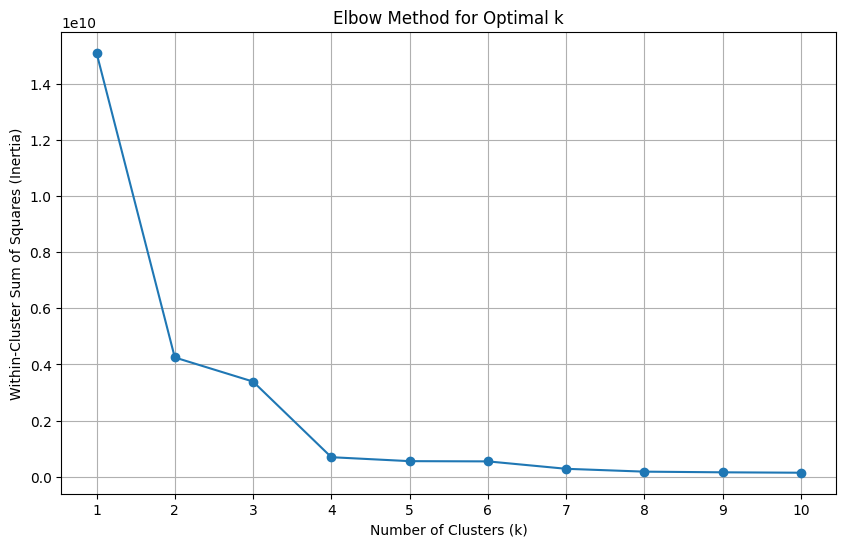

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'scaled_features' contains the scaled features obtained after feature scaling

# Initialize an empty list to store the within-cluster sum of squares (inertia) for different k values
inertia = []

# Define the range of k values to test
k_values = range(1, 11)

# Iterate through each k value and fit KMeans model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


## Silhouette Method

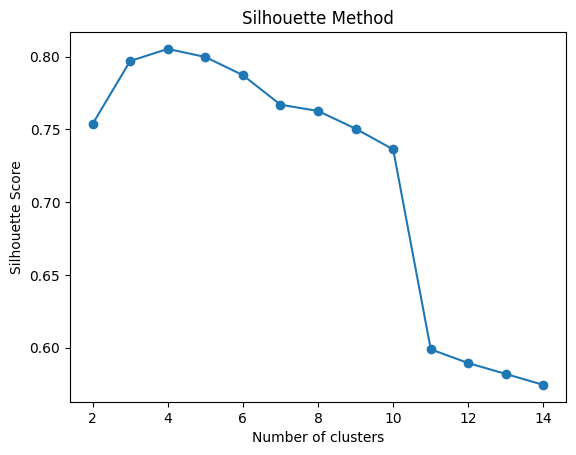

In [79]:
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sampling a portion of the dataset
sample_frac = 0.4  # Adjust the fraction as needed
num_samples = int(sample_frac * scaled_df.shape[0])
sample_indices = np.random.choice(scaled_df.shape[0], size=num_samples, replace=False)
df_sampled = scaled_df[sample_indices]

# List to store silhouette scores
silhouette_scores = []

# Fit KMeans and calculate silhouette scores for 2 to 14 clusters
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_sampled)
    silhouette_avg = silhouette_score(df_sampled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# KMeans

Objective: The objective of clustering in this context could be to identify groups of clients that exhibit similar patterns of electricity consumption over time. Clustering can help in segmenting clients based on their consumption behavior, which can be valuable for various purposes such as understanding customer segments, identifying outliers, or optimizing energy distribution strategies.

By clustering this dataset, you can potentially discover ***who have similar consumption patterns***, which can then be further analyzed to derive insights or make data-driven decisions related to energy management or customer segmentation.

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Drop the date column before clustering
scaled_numeric_df = scaled_df.drop(columns=['date'])

# Initialize and fit KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_numeric_df)

# Add cluster labels to the DataFrame
scaled_df['Cluster'] = cluster_labels

# Print out the silhouette score
silhouette_avg = silhouette_score(scaled_numeric_df, cluster_labels)
print("Silhouette Score for k=4:", silhouette_avg)

# Display DataFrame with cluster labels
print(scaled_df.head())


Silhouette Score for k=4: 0.8075838463004006
                  date    MT_001    MT_002  MT_003    MT_004    MT_005  \
0  2012-01-01 00:00:00 -0.666667 -3.250000    -2.0 -2.227273 -2.000000   
1  2012-01-01 00:15:00  0.333333 -0.583333    87.0  0.818182  1.052632   
2  2012-01-01 00:30:00  0.666667 -0.583333    87.0  0.818182  1.157895   
3  2012-01-01 00:45:00  0.333333 -0.583333    87.0  0.909091  1.000000   
4  2012-01-01 01:00:00  0.333333 -0.583333    87.0  0.909091  1.263158   

     MT_006  MT_007  MT_008    MT_009  ...    MT_362    MT_363    MT_364  \
0 -2.346154    -1.2   -3.00 -1.928571  ... -0.834646 -0.830816 -0.708134   
1  2.192308     2.2    0.32  1.142857  ... -0.273622 -0.211480 -0.349282   
2  2.230769     2.0    0.32  1.071429  ... -0.314961 -0.238671 -0.358852   
3  2.153846     1.8    0.32  1.142857  ... -0.338583 -0.353474 -0.363636   
4  2.038462     1.4    0.32  0.857143  ... -0.366142 -0.356495 -0.363636   

     MT_365    MT_366    MT_367    MT_368    MT_369  

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize and fit KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Print out the silhouette score
silhouette_avg = silhouette_score(scaled_df, cluster_labels)
print("Silhouette Score for k=4:", silhouette_avg)

# Display DataFrame with cluster labels
print(df.head())


Silhouette Score for k=4: 0.8075792867689429
                  date            MT_001            MT_002            MT_003  \
0  2012-01-01 00:00:00                 0                 0                 0   
1  2012-01-01 00:15:00  3,80710659898477  22,7596017069701  77,3240660295395   
2  2012-01-01 00:30:00   5,0761421319797  22,7596017069701  77,3240660295395   
3  2012-01-01 00:45:00  3,80710659898477  22,7596017069701  77,3240660295395   
4  2012-01-01 01:00:00  3,80710659898477  22,7596017069701  77,3240660295395   

             MT_004            MT_005            MT_006            MT_007  \
0                 0                 0                 0                 0   
1  136,178861788618  70,7317073170732  351,190476190476  9,60994912379876   
2  136,178861788618  73,1707317073171  354,166666666667  9,04465799886942   
3  140,243902439024  69,5121951219512  348,214285714286  8,47936687394008   
4  140,243902439024   75,609756097561  339,285714285714   7,3487846240814   

           

## Visualization

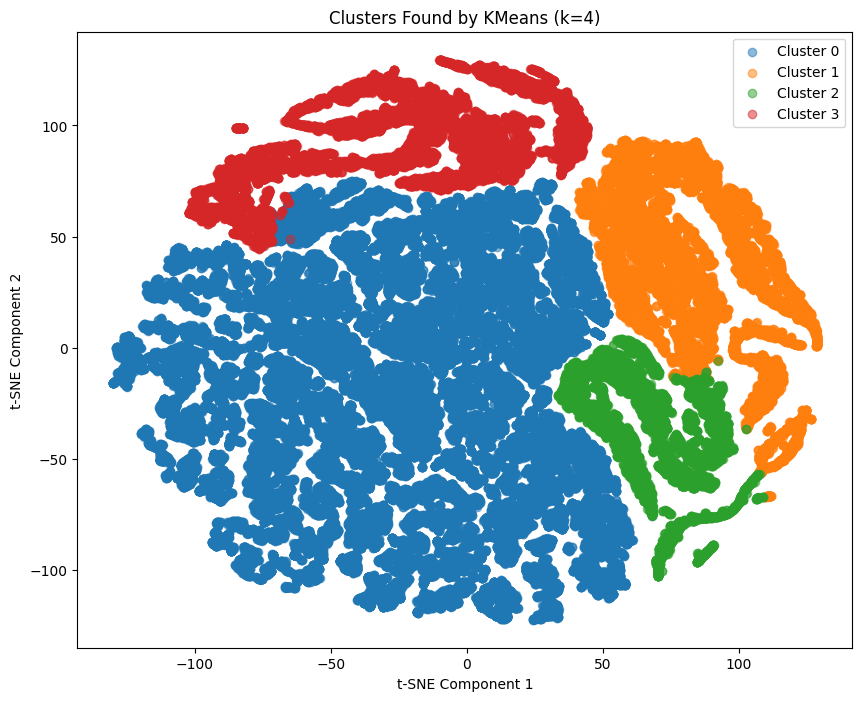

In [12]:
import matplotlib.pyplot as plt

# Plot clusters
plt.figure(figsize=(10, 8))
for cluster_label in range(4):  # assuming 4 clusters
    cluster_data = tsne_results[cluster_labels == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters Found by KMeans (k=4)')
plt.legend()
plt.show()


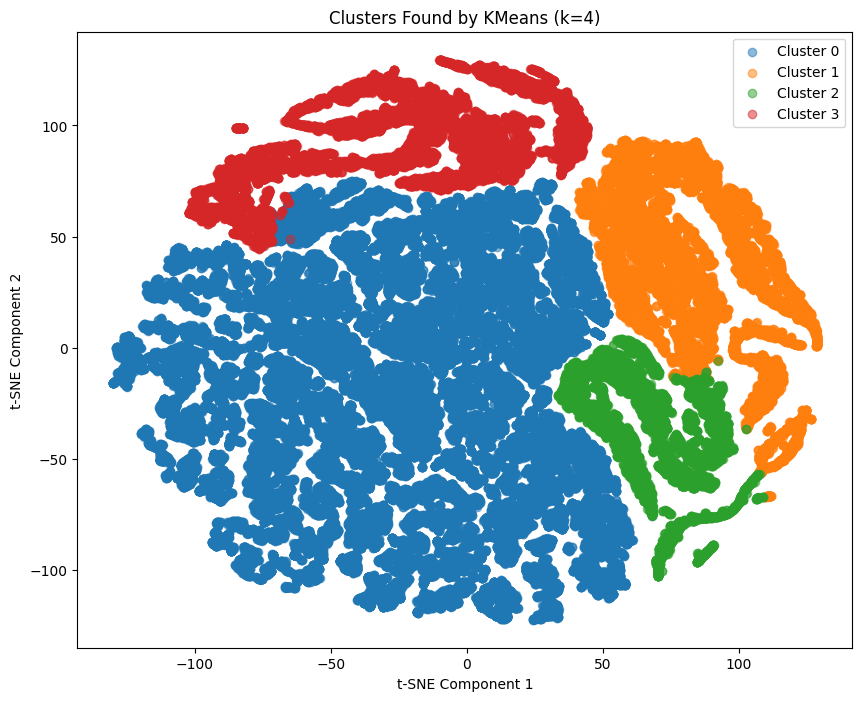

In [12]:
import matplotlib.pyplot as plt

# Plot clusters
plt.figure(figsize=(10, 8))
for cluster_label in range(4):  # assuming 4 clusters
    cluster_data = tsne_results[cluster_labels == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters Found by KMeans (k=4)')
plt.legend()
plt.show()


### Silhouette  Davies-Bouldin Score

**Silhouette Score:**
*A score close to 1 indicates that the clusters are dense and well-separated from each other.*
A score close to 0 indicates overlapping clusters.
A negative score suggests that a data point might have been assigned to the wrong cluster.

**Davies-Bouldin Index:**
*Lower values indicate better clustering.*
It measures the average similarity between each cluster and its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.


In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming 'scaled_numeric_df' contains the scaled numeric features obtained after feature scaling

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_numeric_df, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(scaled_numeric_df, cluster_labels)
print("Davies-Bouldin Score:", davies_bouldin_avg)


Silhouette Score: 0.8075838463004006
Davies-Bouldin Score: 0.3795568106563067


## ACF

##### *A few tries to see how plot_acf is working.*

## ACF Graph Examples

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

# Define input file path
input_file = r"C:/Users/"
# Read the data
df = pd.read_csv(input_file)

# Replace commas with periods and convert dataframe to numeric type
df_numeric = df.drop(columns=['date']).replace(',', '.', regex=True).apply(pd.to_numeric)

# Plot ACF for the first 10 columns
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
for i, column in enumerate(df_numeric.columns[:10], start=1):
    plt.subplot(2, 5, i)
    plot_acf(df_numeric[column], lags=min(50, len(df_numeric)-1), ax=plt.gca())  # Adjust the number of lags as needed
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'ACF - {column}')
plt.tight_layout()
plt.show()


## Elbow Method for ACF

C:\Users\GizemAkgonullu\AppData\Local\Temp\ipykernel_19740\1830507619.py:11: DtypeWarning: Columns (12,15,24,30,32,33,39,41,92,106,107,108,109,110,111,112,113,115,116,117,120,121,122,127,131,133,134,144,152,160,165,167,170,173,177,178,179,181,184,185,186,223,224,255,289,305,308,322,332,337,347,370) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


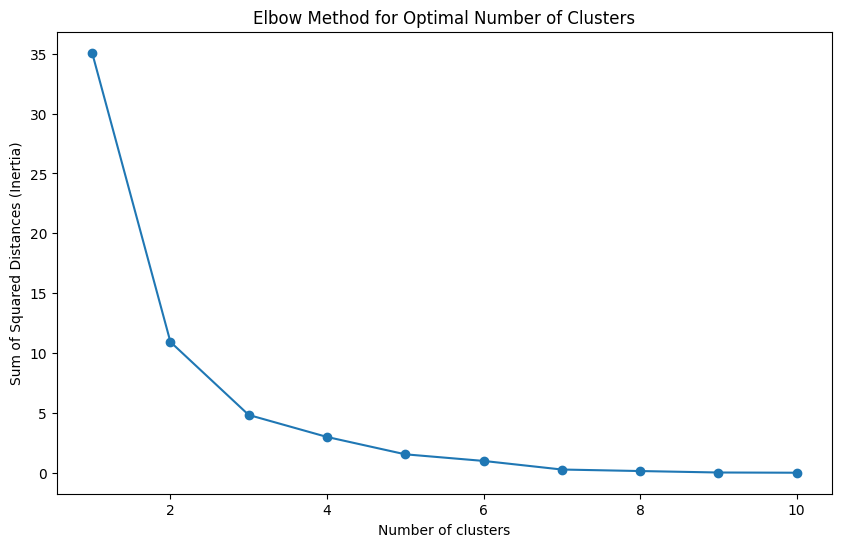

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.cluster import KMeans
import numpy as np

# Define input file path
input_file = r"C:/Users/"

# Read the data
df = pd.read_csv(input_file)

# Replace commas with periods and convert dataframe to numeric type
df_numeric = df.drop(columns=['date']).replace(',', '.', regex=True).apply(pd.to_numeric)

# Function to extract features from ACF graphs
def extract_acf_features(dataframe):
    acf_features = []
    for column in dataframe.columns[:10]:  # Consider only the first 10 columns for demonstration
        acf_values = acf(dataframe[column], nlags=min(50, len(dataframe)-1), fft=True)
        acf_features.append(acf_values)
    return acf_features

# Extract ACF features
acf_features = np.array(extract_acf_features(df_numeric))

# Apply KMeans clustering to ACF features
elbow_scores = []
max_clusters = min(10, len(acf_features))  # Maximum number of clusters
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(acf_features)
    elbow_scores.append(kmeans.inertia_)

# Plot elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), elbow_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


## Silhouette Method for ACF

C:\Users\GizemAkgonullu\AppData\Local\Temp\ipykernel_19740\334157420.py:12: DtypeWarning: Columns (12,15,24,30,32,33,39,41,92,106,107,108,109,110,111,112,113,115,116,117,120,121,122,127,131,133,134,144,152,160,165,167,170,173,177,178,179,181,184,185,186,223,224,255,289,305,308,322,332,337,347,370) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


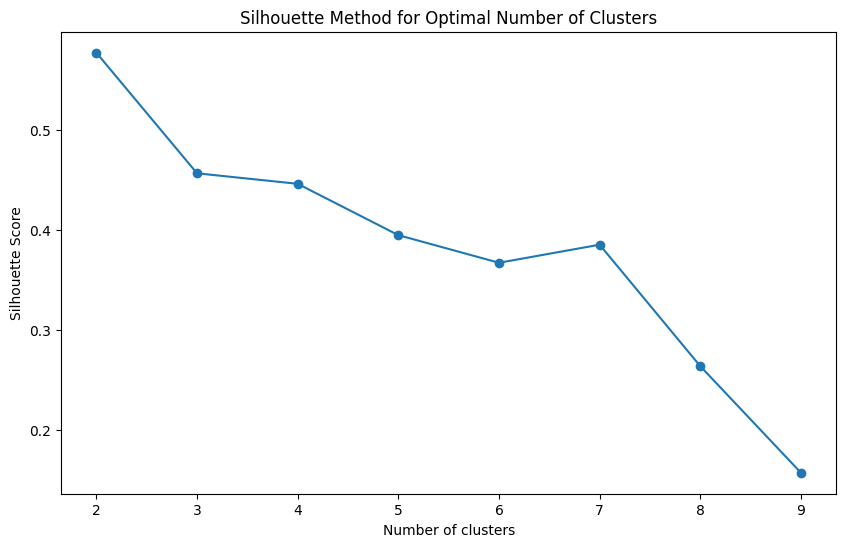

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Define input file path
input_file = r""

# Read the data
df = pd.read_csv(input_file)

# Replace commas with periods and convert dataframe to numeric type
df_numeric = df.drop(columns=['date']).replace(',', '.', regex=True).apply(pd.to_numeric)

# Function to extract features from ACF graphs
def extract_acf_features(dataframe):
    acf_features = []
    for column in dataframe.columns[:10]:  # Consider only the first 10 columns for demonstration
        acf_values = acf(dataframe[column], nlags=min(50, len(dataframe)-1), fft=True)
        acf_features.append(acf_values)
    return acf_features

# Extract ACF features
acf_features = np.array(extract_acf_features(df_numeric))

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
max_clusters = min(len(acf_features) - 1, 10)  # Maximum number of clusters
for k in range(2, max_clusters + 1):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(acf_features)
    silhouette_avg = silhouette_score(acf_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.show()


## Clustering and Visualization of ACF Graphs

C:\Users\GizemAkgonullu\AppData\Local\Temp\ipykernel_19740\1657281729.py:11: DtypeWarning: Columns (12,15,24,30,32,33,39,41,92,106,107,108,109,110,111,112,113,115,116,117,120,121,122,127,131,133,134,144,152,160,165,167,170,173,177,178,179,181,184,185,186,223,224,255,289,305,308,322,332,337,347,370) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


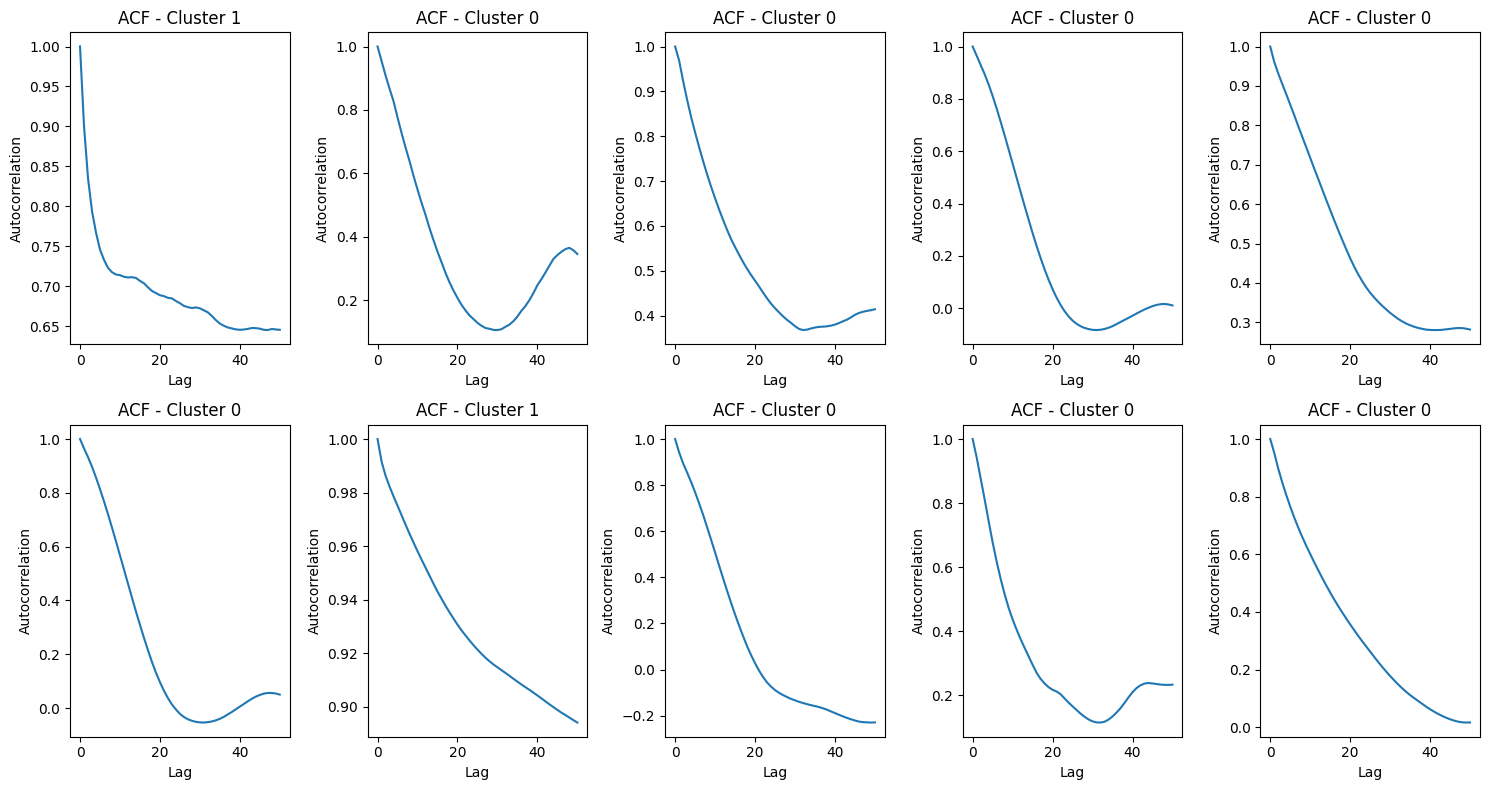

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.cluster import KMeans
import numpy as np

# Define input file path
input_file = r"C:/Users/"

# Read the data
df = pd.read_csv(input_file)

# Replace commas with periods and convert dataframe to numeric type
df_numeric = df.drop(columns=['date']).replace(',', '.', regex=True).apply(pd.to_numeric)

# Function to extract features from ACF graphs
def extract_acf_features(dataframe):
    acf_features = []
    for column in dataframe.columns[:10]:  # Consider only the first 10 columns for demonstration
        acf_values = acf(dataframe[column], nlags=min(50, len(dataframe)-1), fft=True)
        acf_features.append(acf_values)
    return acf_features

# Extract ACF features
acf_features = np.array(extract_acf_features(df_numeric))

# Cluster ACF features using KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(acf_features)

# Visualize clustering results
plt.figure(figsize=(15, 8))
for i, label in enumerate(cluster_labels):
    plt.subplot(2, 5, i+1)
    plt.plot(acf_features[i], label=f'Cluster {label}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'ACF - Cluster {label}')
plt.tight_layout()
plt.show()


C:\Users\GizemAkgonullu\AppData\Local\Temp\ipykernel_19740\2982758377.py:8: DtypeWarning: Columns (12,15,24,30,32,33,39,41,92,106,107,108,109,110,111,112,113,115,116,117,120,121,122,127,131,133,134,144,152,160,165,167,170,173,177,178,179,181,184,185,186,223,224,255,289,305,308,322,332,337,347,370) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file)


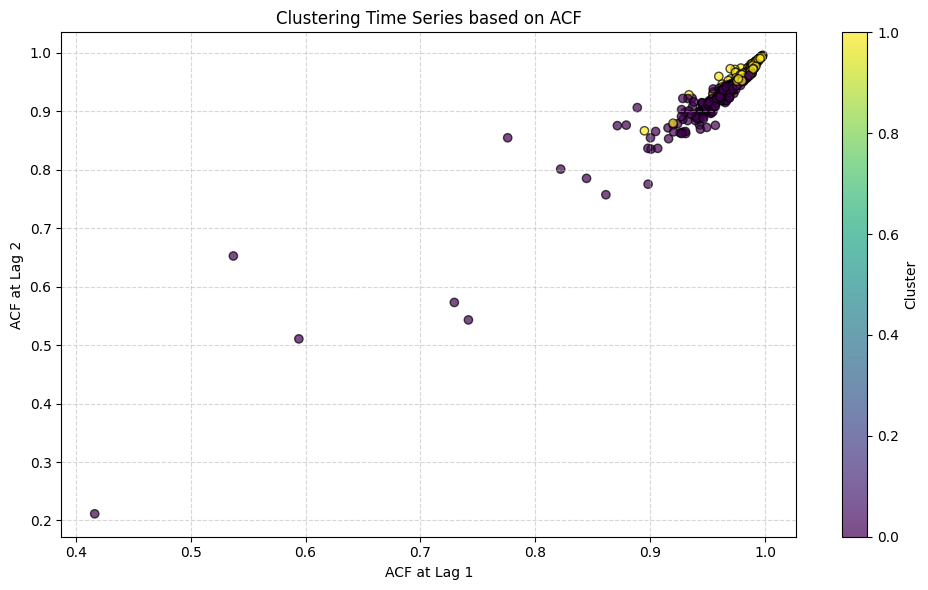

In [28]:
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the data from the CSV file
input_file = "output.csv"
data = pd.read_csv(input_file)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as the index
data.set_index('date', inplace=True)

# Replace commas with periods and convert data to float
data = data.replace(',', '.', regex=True).astype(float)

# Compute ACF for each time series
lags = range(1, 11)  # Select lags from 1 to 10
acf_data = {}
for column in data.columns:
    acf_values = acf(data[column], nlags=10)
    acf_data[column] = acf_values[1:]  # Exclude the first value (lag 0)

# Prepare data for clustering
acf_df = pd.DataFrame(acf_data).T  # Transpose to have time series as rows and lags as columns

# Apply K-means clustering
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(acf_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(acf_df.iloc[:, 0], acf_df.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel('ACF at Lag 1')
plt.ylabel('ACF at Lag 2')
plt.title('Clustering Time Series based on ACF')
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


C:\Users\GizemAkgonullu\AppData\Local\Temp\ipykernel_19740\743180797.py:8: DtypeWarning: Columns (12,15,24,30,32,33,39,41,92,106,107,108,109,110,111,112,113,115,116,117,120,121,122,127,131,133,134,144,152,160,165,167,170,173,177,178,179,181,184,185,186,223,224,255,289,305,308,322,332,337,347,370) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file)


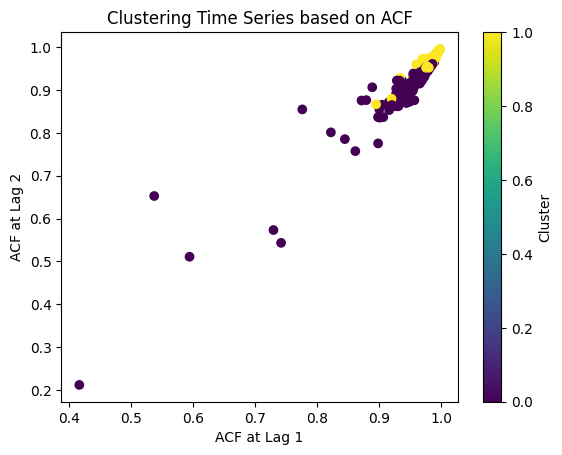

In [29]:
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the data from the CSV file
input_file = "output.csv"
data = pd.read_csv(input_file)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as the index
data.set_index('date', inplace=True)

# Replace commas with periods and convert data to float
data = data.replace(',', '.', regex=True).astype(float)

# Compute ACF for each time series
lags = range(1, 11)  # Select lags from 1 to 10
acf_data = {}
for column in data.columns:
    acf_values = acf(data[column], nlags=10)
    acf_data[column] = acf_values[1:]  # Exclude the first value (lag 0)

# Prepare data for clustering
acf_df = pd.DataFrame(acf_data).T  # Transpose to have time series as rows and lags as columns

# Apply K-means clustering
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(acf_df)

# Visualize the clusters
plt.scatter(acf_df.iloc[:, 0], acf_df.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('ACF at Lag 1')
plt.ylabel('ACF at Lag 2')
plt.title('Clustering Time Series based on ACF')
plt.colorbar(label='Cluster')
plt.show()


## After the Threshold

C:\Users\GizemAkgonullu\AppData\Local\Temp\ipykernel_19740\945803214.py:8: DtypeWarning: Columns (12,15,24,30,32,33,39,41,92,106,107,108,109,110,111,112,113,115,116,117,120,121,122,127,131,133,134,144,152,160,165,167,170,173,177,178,179,181,184,185,186,223,224,255,289,305,308,322,332,337,347,370) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file)


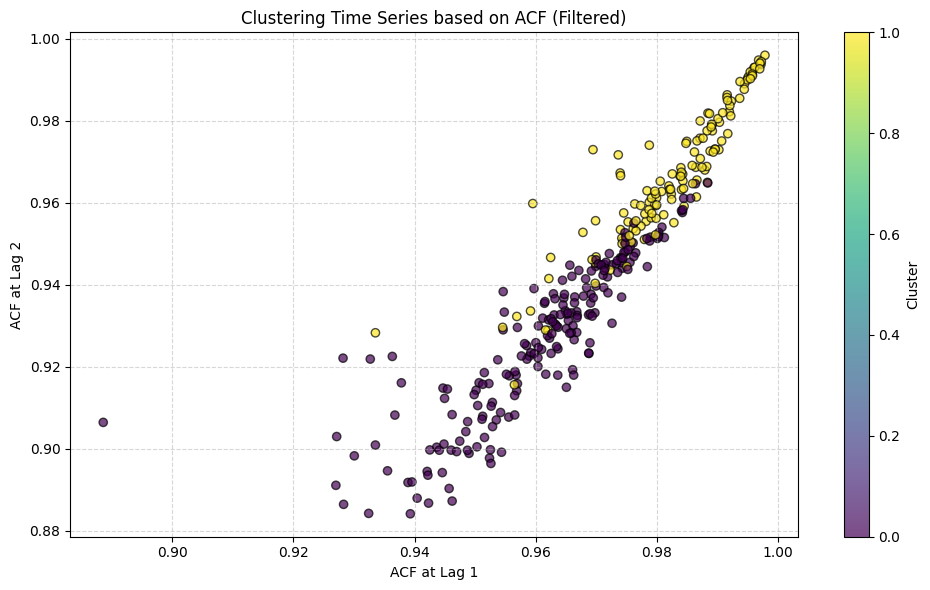

In [30]:
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the data from the CSV file
input_file = "output.csv"
data = pd.read_csv(input_file)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as the index
data.set_index('date', inplace=True)

# Replace commas with periods and convert data to float
data = data.replace(',', '.', regex=True).astype(float)

# Compute ACF for each time series
lags = range(1, 11)  # Select lags from 1 to 10
acf_data = {}
for column in data.columns:
    acf_values = acf(data[column], nlags=10)
    acf_data[column] = acf_values[1:]  # Exclude the first value (lag 0)

# Prepare data for clustering
acf_df = pd.DataFrame(acf_data).T  # Transpose to have time series as rows and lags as columns

# Apply K-means clustering
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(acf_df)

# Filter out data points below the threshold
threshold = 0.88
filtered_acf_df = acf_df[(acf_df.iloc[:, 0] > threshold) & (acf_df.iloc[:, 1] > threshold)]

# Apply K-means clustering on filtered data
filtered_clusters = kmeans.predict(filtered_acf_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_acf_df.iloc[:, 0], filtered_acf_df.iloc[:, 1], c=filtered_clusters, cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel('ACF at Lag 1')
plt.ylabel('ACF at Lag 2')
plt.title('Clustering Time Series based on ACF (Filtered)')
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


C:\Users\GizemAkgonullu\AppData\Local\Temp\ipykernel_19740\1714029232.py:9: DtypeWarning: Columns (12,15,24,30,32,33,39,41,92,106,107,108,109,110,111,112,113,115,116,117,120,121,122,127,131,133,134,144,152,160,165,167,170,173,177,178,179,181,184,185,186,223,224,255,289,305,308,322,332,337,347,370) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file)


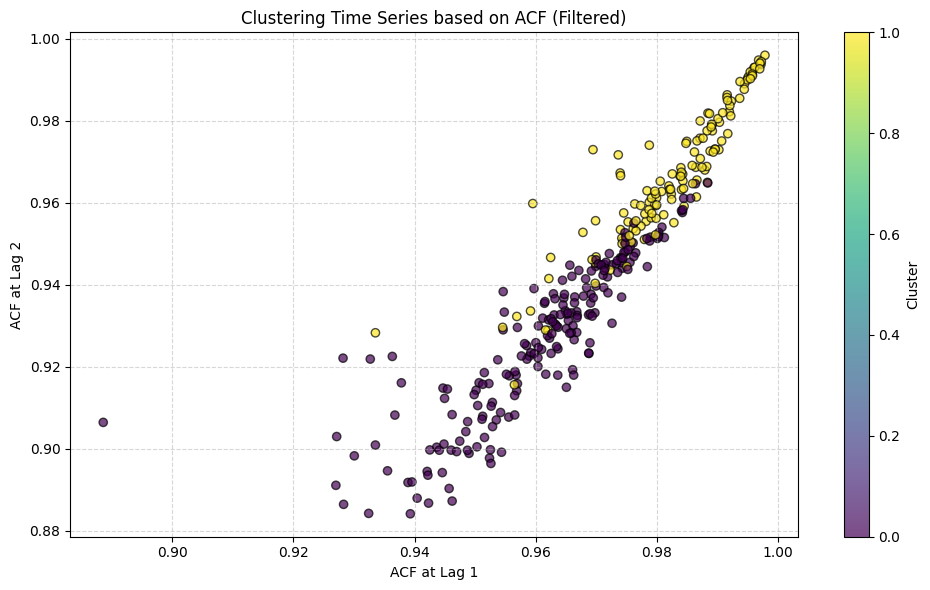

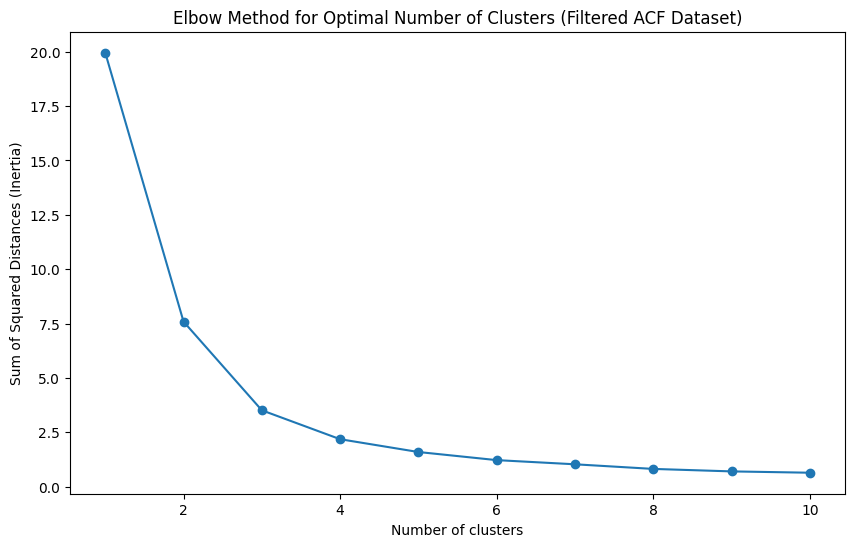

In [31]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the data from the CSV file
input_file = "output.csv"
data = pd.read_csv(input_file)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as the index
data.set_index('date', inplace=True)

# Replace commas with periods and convert data to float
data = data.replace(',', '.', regex=True).astype(float)

# Compute ACF for each time series
lags = range(1, 11)  # Select lags from 1 to 10
acf_data = {}
for column in data.columns:
    acf_values = acf(data[column], nlags=10)
    acf_data[column] = acf_values[1:]  # Exclude the first value (lag 0)

# Prepare data for clustering
acf_df = pd.DataFrame(acf_data).T  # Transpose to have time series as rows and lags as columns

# Apply K-means clustering
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(acf_df)

# Filter out data points below the threshold
threshold = 0.88
filtered_acf_df = acf_df[(acf_df.iloc[:, 0] > threshold) & (acf_df.iloc[:, 1] > threshold)]

# Apply K-means clustering on filtered data
filtered_clusters = kmeans.predict(filtered_acf_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_acf_df.iloc[:, 0], filtered_acf_df.iloc[:, 1], c=filtered_clusters, cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel('ACF at Lag 1')
plt.ylabel('ACF at Lag 2')
plt.title('Clustering Time Series based on ACF (Filtered)')
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Create a new dataset for filtered ACF graphs
filtered_acf_dataset = pd.DataFrame(filtered_acf_df.values, columns=[f'Lag_{i+1}' for i in range(filtered_acf_df.shape[1])])

# Apply elbow method to find the best k value for the filtered dataset
elbow_scores = []
max_clusters = min(10, len(filtered_acf_dataset))  # Maximum number of clusters
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filtered_acf_dataset)
    elbow_scores.append(kmeans.inertia_)

# Plot elbow graph for the filtered dataset
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), elbow_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters (Filtered ACF Dataset)')
plt.show()


C:\Users\GizemAkgonullu\AppData\Local\Temp\ipykernel_19740\654366269.py:10: DtypeWarning: Columns (12,15,24,30,32,33,39,41,92,106,107,108,109,110,111,112,113,115,116,117,120,121,122,127,131,133,134,144,152,160,165,167,170,173,177,178,179,181,184,185,186,223,224,255,289,305,308,322,332,337,347,370) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file)


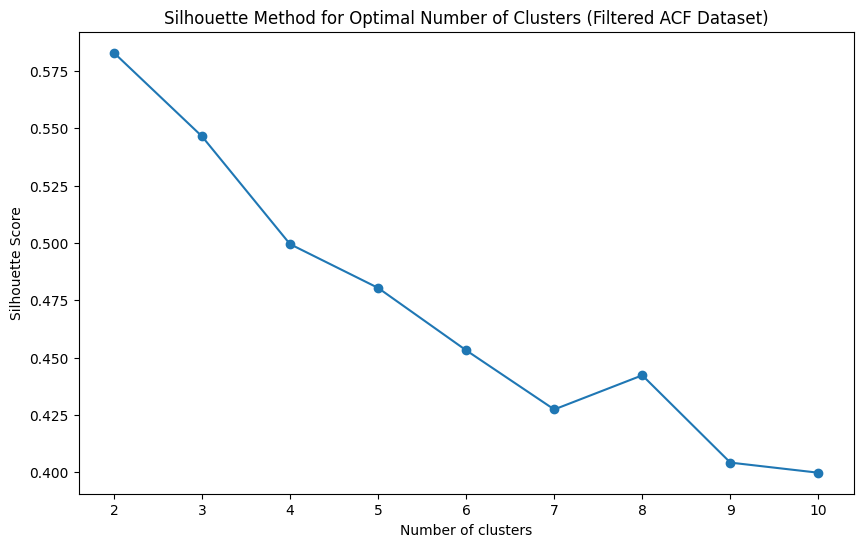

In [32]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read the data from the CSV file
input_file = "output.csv"
data = pd.read_csv(input_file)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as the index
data.set_index('date', inplace=True)

# Replace commas with periods and convert data to float
data = data.replace(',', '.', regex=True).astype(float)

# Compute ACF for each time series
lags = range(1, 11)  # Select lags from 1 to 10
acf_data = {}
for column in data.columns:
    acf_values = acf(data[column], nlags=10)
    acf_data[column] = acf_values[1:]  # Exclude the first value (lag 0)

# Prepare data for clustering
acf_df = pd.DataFrame(acf_data).T  # Transpose to have time series as rows and lags as columns

# Apply K-means clustering
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(acf_df)

# Filter out data points below the threshold
threshold = 0.88
filtered_acf_df = acf_df[(acf_df.iloc[:, 0] > threshold) & (acf_df.iloc[:, 1] > threshold)]

# Apply K-means clustering on filtered data
filtered_clusters = kmeans.predict(filtered_acf_df)

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
max_clusters = min(10, len(filtered_acf_df))  # Maximum number of clusters
for k in range(2, max_clusters + 1):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(filtered_acf_df)
    silhouette_avg = silhouette_score(filtered_acf_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters (Filtered ACF Dataset)')
plt.show()


C:\Users\GizemAkgonullu\AppData\Local\Temp\ipykernel_19740\3192809590.py:8: DtypeWarning: Columns (12,15,24,30,32,33,39,41,92,106,107,108,109,110,111,112,113,115,116,117,120,121,122,127,131,133,134,144,152,160,165,167,170,173,177,178,179,181,184,185,186,223,224,255,289,305,308,322,332,337,347,370) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file)


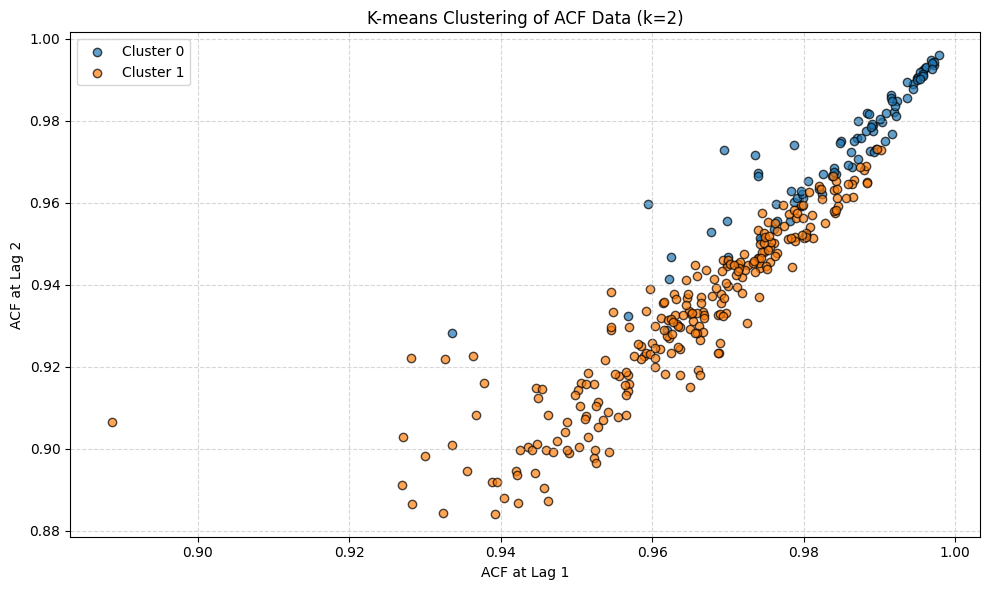

In [34]:
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the data from the CSV file
input_file = "output.csv"
data = pd.read_csv(input_file)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as the index
data.set_index('date', inplace=True)

# Replace commas with periods and convert data to float
data = data.replace(',', '.', regex=True).astype(float)

# Compute ACF for each time series
lags = range(1, 11)  # Select lags from 1 to 10
acf_data = {}
for column in data.columns:
    acf_values = acf(data[column], nlags=10)
    acf_data[column] = acf_values[1:]  # Exclude the first value (lag 0)

# Prepare data for clustering
acf_df = pd.DataFrame(acf_data).T  # Transpose to have time series as rows and lags as columns

# Filter out data points below the threshold
threshold = 0.88
filtered_acf_df = acf_df[(acf_df.iloc[:, 0] > threshold) & (acf_df.iloc[:, 1] > threshold)]

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(filtered_acf_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for label in range(2):
    plt.scatter(filtered_acf_df.iloc[cluster_labels == label, 0], filtered_acf_df.iloc[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.7, edgecolors='k')
plt.xlabel('ACF at Lag 1')
plt.ylabel('ACF at Lag 2')
plt.title('K-means Clustering of ACF Data (k=2)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [35]:
# Calculate Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(filtered_acf_df, cluster_labels)

# Calculate silhouette score
silhouette_avg = silhouette_score(filtered_acf_df, cluster_labels)

print("Davies-Bouldin Index:", davies_bouldin_index)
print("Silhouette Score:", silhouette_avg)


Davies-Bouldin Index: 0.5778964156418535
Silhouette Score: 0.5829016477933966
